In [25]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.svm import SVR

In [38]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [59]:
my_c = 100
my_epsilon = 0.1

In [60]:
svr_rbf = SVR(kernel="rbf", C=my_c, gamma=0.1, epsilon=my_epsilon)
svr_lin = SVR(kernel="linear", C=my_c, gamma="auto")
svr_poly = SVR(kernel="poly", C=my_c, gamma="auto", degree=3, epsilon=my_epsilon, coef0=1)

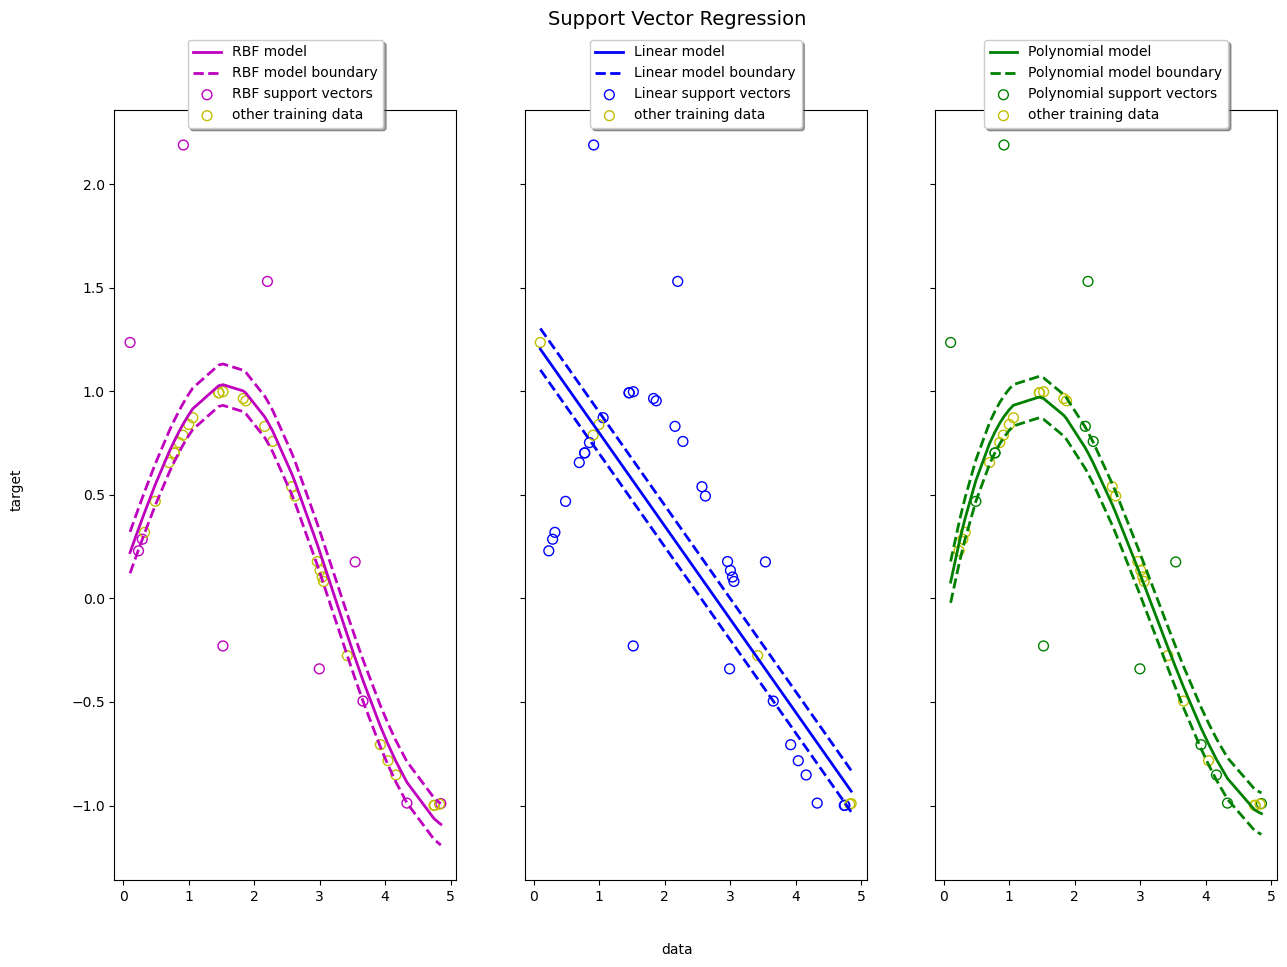

In [63]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "b", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    # plot the model
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    
    # plot the upper tube boundaries
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X) + my_epsilon,
        '--',
        color=model_color[ix],
        lw=lw,
        label="{} model boundary".format(kernel_label[ix]),
    )
    
    # plot the lower tube boundaries
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X) - my_epsilon,
        '--',
        color=model_color[ix],
        lw=lw,
    )
    
    # plot the support vectors
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    
    # plot the non-support vectors
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="y",
        s=50,
        label="other training data",
    )
    
    # add legend
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()